# Data Wrangling

### Import The Libraries, Load The Dataset & Wrangle it:

In [1]:
# Import the libraries
import warnings

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

warnings.simplefilter(action = "ignore", category = FutureWarning)

# Load the clean version of the dataset
# Assign to a dataframe
# Perform feature selection:
df_rainfall = pd.read_csv("austin_weather_clean.csv")
df_rainfall.drop(columns = ["DewPointHighF", "DewPointLowF"], inplace = True)

# Remove outliers from the data;
#'VisibilityHighMiles' column:
low, high = df_rainfall["VisibilityHighMiles"].quantile([0.01, 1])
mask_visibilityH = df_rainfall["VisibilityHighMiles"].between(low, high)
#'SeaLevelPressureAvgInches' column:
low, high = df_rainfall["SeaLevelPressureAvgInches"].quantile([0.25, 1])
mask_seaLevel = df_rainfall["SeaLevelPressureAvgInches"].between(low, high)

# Transform the dataframe:
df_rainfall = df_rainfall[mask_visibilityH & mask_seaLevel]

### Extract The Independent & Dependent Variables:

In [2]:
# The independent variables:
input_ds = df_rainfall.drop(columns = ["PrecipitationSumInches", "Unnamed: 0"])
# The dependent variable:
output_ds = df_rainfall["PrecipitationSumInches"]

# Exploratory Data Analysis

In [3]:
# Explore the dataframe; the first 10 rows
df_rainfall.head(10)

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1,1,56,48,39,36.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.0
2,2,58,45,32,27.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.0
3,3,61,46,31,28.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.0
4,4,58,50,41,40.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.0
5,5,57,48,39,36.0,79.0,63.0,47.0,30.40,10.0,9.0,7.0,12.0,3.0,17.0,0.0
6,6,60,53,45,39.0,83.0,65.0,47.0,30.39,10.0,9.0,7.0,7.0,1.0,11.0,0.0
7,7,62,51,40,39.0,92.0,64.0,36.0,30.17,10.0,10.0,7.0,10.0,2.0,14.0,0.0
8,8,64,50,36,41.0,92.0,76.0,60.0,30.10,10.0,10.0,4.0,17.0,5.0,24.0,0.0
9,9,44,40,35,26.0,75.0,60.0,45.0,30.33,10.0,10.0,10.0,13.0,5.0,21.0,0.0
10,10,55,46,36,28.0,76.0,54.0,32.0,30.39,10.0,10.0,10.0,8.0,1.0,12.0,0.0


In [4]:
# Display the last 10 rows of the dataframe:
df_rainfall.tail(10)

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1305,1305,100,88,76,70.0,88.0,61.0,33.0,29.98,10.0,10.0,10.0,14.0,5.0,20.0,0.00
1306,1306,101,89,77,70.0,88.0,60.0,31.0,30.07,10.0,10.0,10.0,18.0,5.0,29.0,0.00
1307,1307,103,90,77,69.0,85.0,56.0,27.0,30.03,10.0,10.0,10.0,14.0,5.0,22.0,0.00
1308,1308,104,91,77,68.0,85.0,56.0,27.0,29.95,10.0,10.0,10.0,14.0,5.0,24.0,0.00
1311,1311,102,89,76,71.0,91.0,60.0,29.0,29.95,10.0,10.0,9.0,13.0,3.0,19.0,0.01
1312,1312,103,91,78,71.0,91.0,61.0,31.0,30.03,10.0,10.0,9.0,15.0,7.0,24.0,0.00
1313,1313,103,91,78,70.0,91.0,58.0,25.0,30.03,10.0,10.0,10.0,15.0,6.0,27.0,0.00
1314,1314,103,89,75,67.0,82.0,54.0,25.0,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.00
1317,1317,106,93,79,68.0,69.0,48.0,27.0,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.00
1318,1318,99,88,77,61.0,64.0,43.0,22.0,29.97,10.0,10.0,10.0,12.0,4.0,20.0,0.00


In [5]:
# Remove the unwanted column('Unnamed: 0):
df_rainfall.drop(columns = ["Unnamed: 0"], inplace = True)

In [6]:
# An overview of the dataframe:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1 to 1318
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TempHighF                  1008 non-null   int64  
 1   TempAvgF                   1008 non-null   int64  
 2   TempLowF                   1008 non-null   int64  
 3   DewPointAvgF               1008 non-null   float64
 4   HumidityHighPercent        1008 non-null   float64
 5   HumidityAvgPercent         1008 non-null   float64
 6   HumidityLowPercent         1008 non-null   float64
 7   SeaLevelPressureAvgInches  1008 non-null   float64
 8   VisibilityHighMiles        1008 non-null   float64
 9   VisibilityAvgMiles         1008 non-null   float64
 10  VisibilityLowMiles         1008 non-null   float64
 11  WindHighMPH                1008 non-null   float64
 12  WindAvgMPH                 1008 non-null   float64
 13  WindGustMPH                1008 non-null   float64
 1

In [7]:
df_rainfall.head()

,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1,56,48,39,36.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.0
2,58,45,32,27.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.0
3,61,46,31,28.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.0
4,58,50,41,40.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.0
5,57,48,39,36.0,79.0,63.0,47.0,30.40,10.0,9.0,7.0,12.0,3.0,17.0,0.0


In [8]:
df_rainfall.tail()

,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
1312,103,91,78,71.0,91.0,61.0,31.0,30.03,10.0,10.0,9.0,15.0,7.0,24.0,0.0
1313,103,91,78,70.0,91.0,58.0,25.0,30.03,10.0,10.0,10.0,15.0,6.0,27.0,0.0
1314,103,89,75,67.0,82.0,54.0,25.0,29.97,10.0,10.0,10.0,12.0,5.0,21.0,0.0
1317,106,93,79,68.0,69.0,48.0,27.0,29.91,10.0,10.0,10.0,13.0,4.0,20.0,0.0
1318,99,88,77,61.0,64.0,43.0,22.0,29.97,10.0,10.0,10.0,12.0,4.0,20.0,0.0


In [9]:
# Display the independent features:
input_ds.head()

,TempHighF,TempAvgF,TempLowF,DewPointAvgF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH
1,56,48,39,36.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0
2,58,45,32,27.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0
3,61,46,31,28.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0
4,58,50,41,40.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0
5,57,48,39,36.0,79.0,63.0,47.0,30.40,10.0,9.0,7.0,12.0,3.0,17.0


In [10]:
input_ds.shape

(1008, 14)

### Feature Distribution & Correlation:

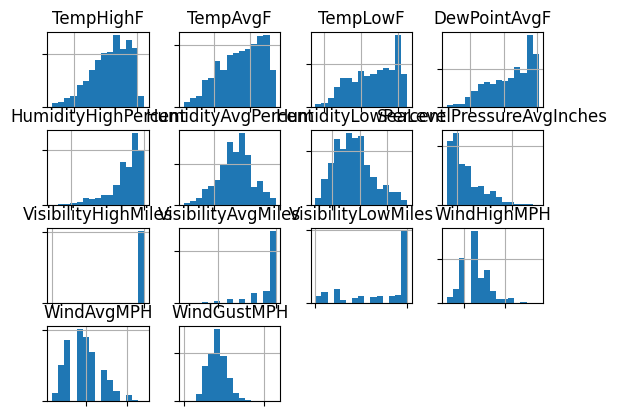

In [11]:
# Distribution of all dependent variables.
# Create a histogram of each:
new_df = df_rainfall.drop(columns=["PrecipitationSumInches"])
distr_hist = new_df.hist(bins=15)

# Disable axis labels to avoid clutter:
for axis in distr_hist.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])
plt.show()

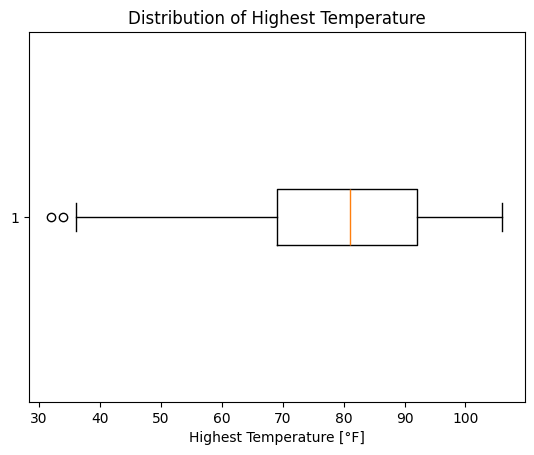

In [12]:
# Use a horizontal boxplot to check for outliers in the 'TempHighF' column:
plt.boxplot(df_rainfall["TempHighF"], vert = False)
plt.xlabel("Highest Temperature [°F]")
plt.title("Distribution of Highest Temperature");

In [13]:
# Summary stats of 'TempHighF' feature:
df_rainfall["TempHighF"].describe()

count    1008.000000
mean       79.078373
std        15.522569
min        32.000000
25%        69.000000
50%        81.000000
75%        92.000000
max       106.000000
Name: TempHighF, dtype: float64

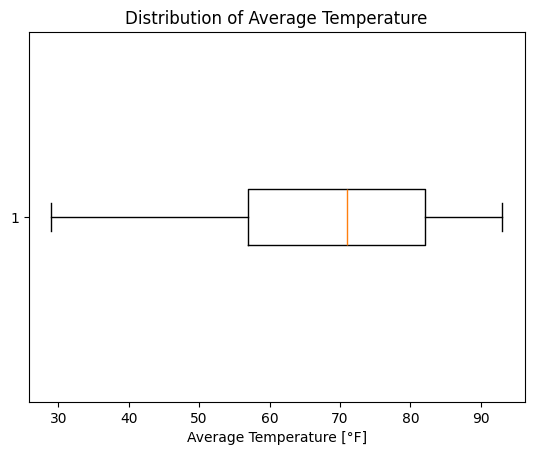

In [14]:
# Use a horizontal boxplot to check for outliers in the 'TempAvgF' column:
plt.boxplot(df_rainfall["TempAvgF"], vert = False)
plt.xlabel("Average Temperature [°F]")
plt.title("Distribution of Average Temperature");

In [15]:
# Summary stats of 'TempAvgF' feature:
df_rainfall["TempAvgF"].describe()

count    1008.000000
mean       68.929563
std        14.742881
min        29.000000
25%        57.000000
50%        71.000000
75%        82.000000
max        93.000000
Name: TempAvgF, dtype: float64

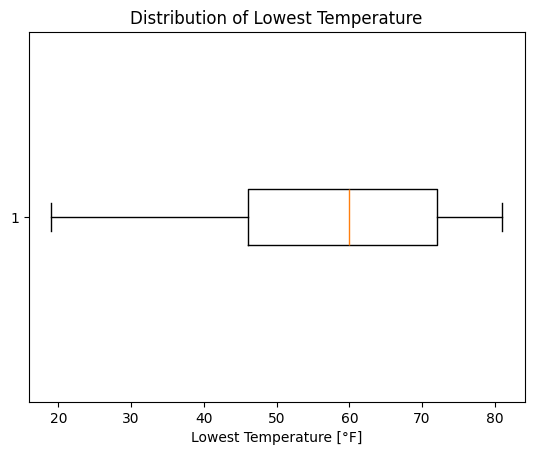

In [16]:
# Use a horizontal boxplot to check for outliers in the 'TempLowF' column:
plt.boxplot(df_rainfall["TempLowF"], vert = False)
plt.xlabel("Lowest Temperature [°F]")
plt.title("Distribution of Lowest Temperature");

In [17]:
# Summary stats of 'TempLowF' feature:
df_rainfall["TempLowF"].describe()

count    1008.000000
mean       58.269841
std        14.835229
min        19.000000
25%        46.000000
50%        60.000000
75%        72.000000
max        81.000000
Name: TempLowF, dtype: float64

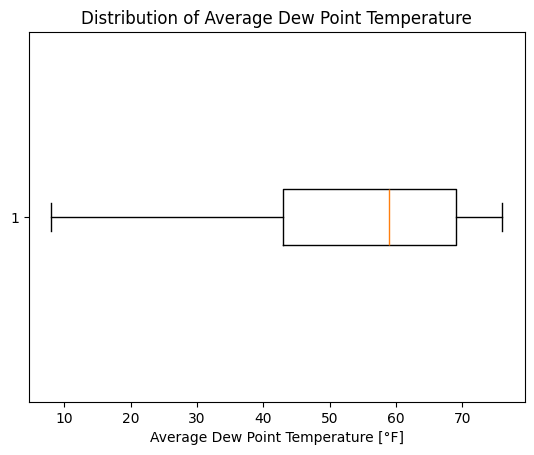

In [18]:
# Use a horizontal boxplot to check for outliers in the 'DewPointAvgF' column:
plt.boxplot(df_rainfall["DewPointAvgF"], vert = False)
plt.xlabel("Average Dew Point Temperature [°F]")
plt.title("Distribution of Average Dew Point Temperature");

In [19]:
df_rainfall["DewPointAvgF"].describe()

count    1008.000000
mean       54.822421
std        15.690123
min         8.000000
25%        43.000000
50%        59.000000
75%        69.000000
max        76.000000
Name: DewPointAvgF, dtype: float64

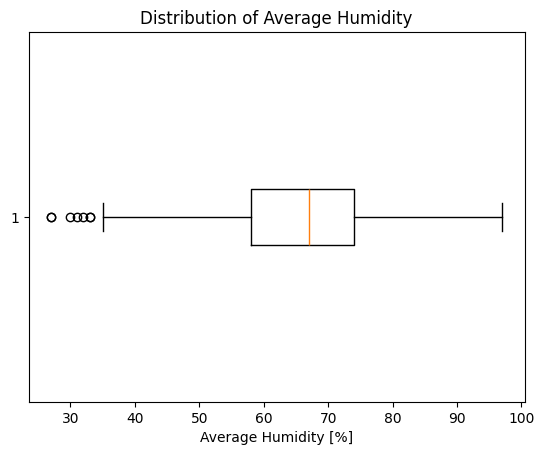

In [20]:
# Use a horizontal boxplot to check for outliers in the 'HumidityAvgPercent' column:
plt.boxplot(df_rainfall["HumidityAvgPercent"], vert = False)
plt.xlabel("Average Humidity [%]")
plt.title("Distribution of Average Humidity");

In [21]:
df_rainfall["HumidityAvgPercent"].describe()

count    1008.000000
mean       66.210317
std        12.755567
min        27.000000
25%        58.000000
50%        67.000000
75%        74.000000
max        97.000000
Name: HumidityAvgPercent, dtype: float64

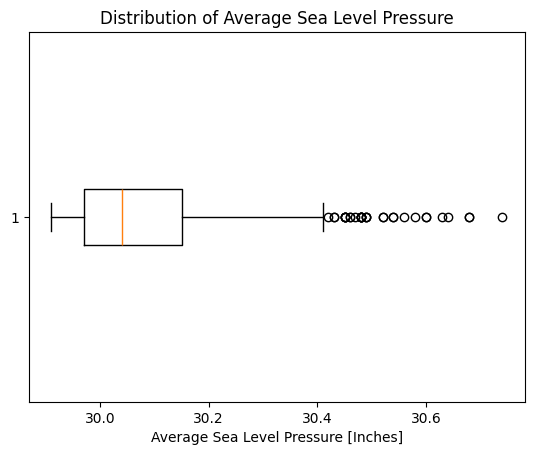

In [22]:
# Use a horizontal boxplot to check for outliers in the 'SeaLevelPressureAvgInches' column:
plt.boxplot(df_rainfall["SeaLevelPressureAvgInches"], vert = False)
plt.xlabel("Average Sea Level Pressure [Inches]")
plt.title("Distribution of Average Sea Level Pressure");

In [23]:
df_rainfall["SeaLevelPressureAvgInches"].describe()

count    1008.000000
mean       30.081349
std         0.146358
min        29.910000
25%        29.970000
50%        30.040000
75%        30.150000
max        30.740000
Name: SeaLevelPressureAvgInches, dtype: float64

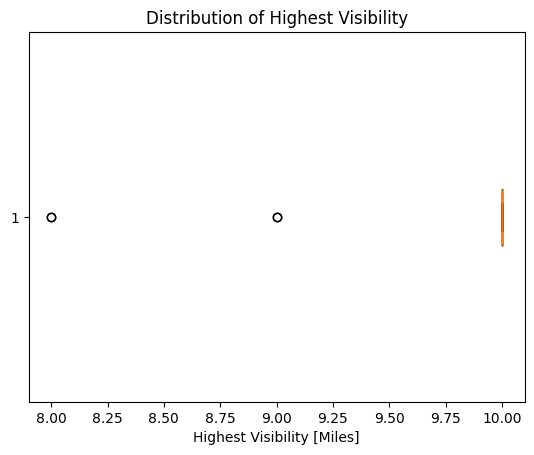

In [24]:
# Use a horizontal boxplot to check for outliers in the 'VisibilityHighMiles' column:
plt.boxplot(df_rainfall["VisibilityHighMiles"], vert = False)
plt.xlabel("Highest Visibility [Miles]")
plt.title("Distribution of Highest Visibility");

In [25]:
df_rainfall["VisibilityHighMiles"].describe()

count    1008.000000
mean        9.994048
std         0.099474
min         8.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: VisibilityHighMiles, dtype: float64

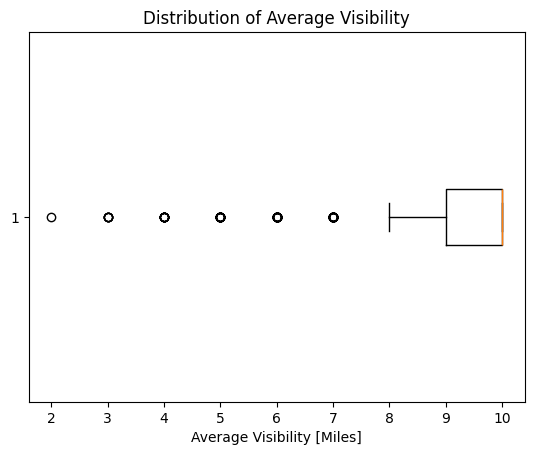

In [26]:
# Use a horizontal boxplot to check for outliers in the 'VisibilityAvgMiles' column:
plt.boxplot(df_rainfall["VisibilityAvgMiles"], vert = False)
plt.xlabel("Average Visibility [Miles]")
plt.title("Distribution of Average Visibility");

In [27]:
df_rainfall["VisibilityAvgMiles"].describe()

count    1008.000000
mean        9.230159
std         1.435333
min         2.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: VisibilityAvgMiles, dtype: float64

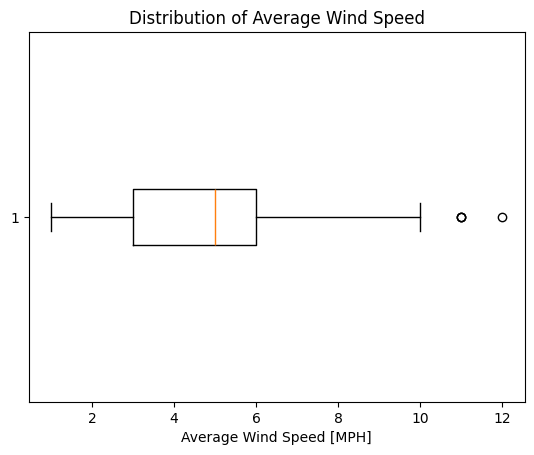

In [28]:
# Use a horizontal boxplot to check for outliers in the 'WindAvgMPH' column:
plt.boxplot(df_rainfall["WindAvgMPH"], vert = False)
plt.xlabel("Average Wind Speed [MPH]")
plt.title("Distribution of Average Wind Speed");

In [29]:
df_rainfall["WindAvgMPH"].describe()

count    1008.000000
mean        4.767857
std         2.029494
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        12.000000
Name: WindAvgMPH, dtype: float64

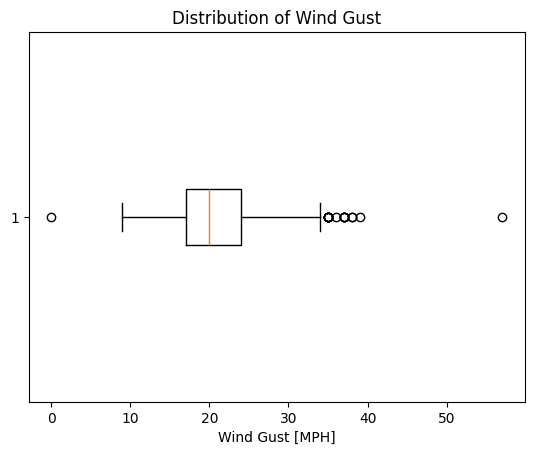

In [30]:
# Use a horizontal boxplot to check for outliers in the 'WindGustMPH' column:
plt.boxplot(df_rainfall["WindGustMPH"], vert = False)
plt.xlabel("Wind Gust [MPH]")
plt.title("Distribution of Wind Gust");

In [31]:
df_rainfall["WindGustMPH"].describe()

count    1008.000000
mean       20.609127
std         5.677006
min         0.000000
25%        17.000000
50%        20.000000
75%        24.000000
max        57.000000
Name: WindGustMPH, dtype: float64

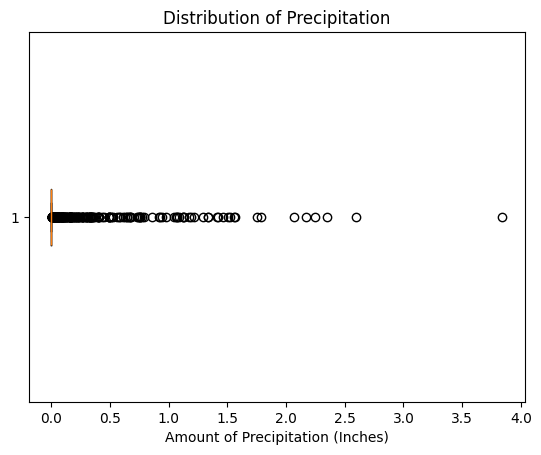

In [32]:
# Use a horizontal boxplot to check for outliers in the 'PrecipitationSumInches' column:
plt.boxplot(df_rainfall["PrecipitationSumInches"], vert = False)
plt.xlabel("Amount of Precipitation (Inches)")
plt.title("Distribution of Precipitation");

In [33]:
# Summary stats of 'PrecipitationSumInches' attribute:
df_rainfall["PrecipitationSumInches"].describe()

count    1008.000000
mean        0.087073
std         0.306352
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.840000
Name: PrecipitationSumInches, dtype: float64

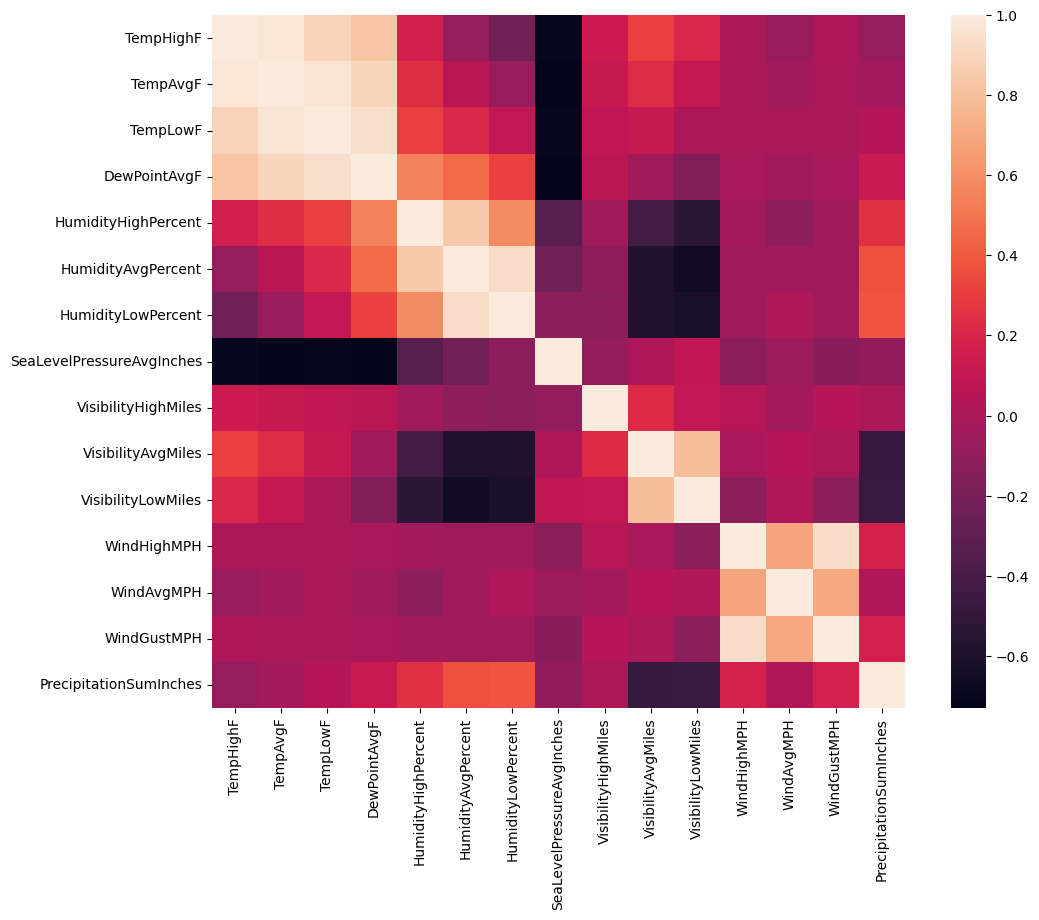

In [34]:
# Correlation matrix.
# Shows the relationship between the dependent variables and the independent variable:
corrmatrix = df_rainfall.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmatrix, vmax = 1.0, square = True)
plt.show()

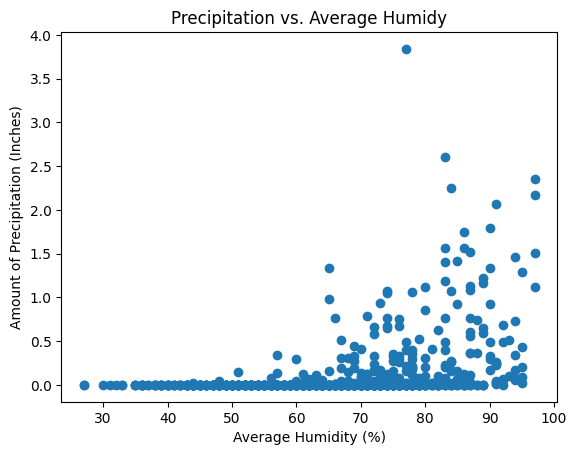

In [35]:
# Create a scatterplot to test if 'HumidityAvgPercent' influences the amount of precipitation:
plt.scatter(df_rainfall["HumidityAvgPercent"], df_rainfall["PrecipitationSumInches"])
plt.xlabel("Average Humidity (%)")
plt.ylabel("Amount of Precipitation (Inches)")
plt.title("Precipitation vs. Average Humidy");

In [36]:
# The Pearson correlation coefficient of 'PrecipitationSumInches' and 'HumidityAvgPercent':
p_correlation = df_rainfall["HumidityAvgPercent"].corr(df_rainfall["PrecipitationSumInches"])
print("The Pearson correlation coefficient is: ", p_correlation)

The Pearson correlation coefficient is:  0.3681990786463334


# Training & Test Splitting Data

In [37]:
# Dataset summary:
print(input_ds.shape, output_ds.shape)

(1008, 14) (1008,)


In [38]:
# Split into train and test sets:
input_train, input_test, output_train, output_test = train_test_split(input_ds, output_ds, test_size = 0.2, random_state = 42)

print("input train: ", input_train.shape)
print("\ninput test: ", input_test.shape)
print("\noutput train: ", output_train.shape)
print("\noutput test: ", output_test.shape)

input train:  (806, 14)

input test:  (202, 14)

output train:  (806,)

output test:  (202,)


In [39]:
# Standardize the training and test set:
sc = StandardScaler()
input_train = sc.fit_transform(input_train)
input_test = sc.transform(input_test)

In [40]:
# Print the first 10 rows of the 'input_train' 2D array:
print(input_train[:10])

[[-1.05255844 -1.23480713 -1.38764384 -2.05959806 -2.63694306 -2.23259463
  -1.56512579  1.58762965  0.05761512  0.54358645  0.83061291  0.67215627
   0.62588596  0.78520543]
 [-1.69273509 -1.23480713 -0.7194392  -0.72643975  0.77073194  0.68428437
   0.54127174  0.425014    0.05761512 -0.90477943 -1.39447727  0.67215627
  -0.36520261  0.25233236]
 [ 1.12404218  0.98464145  0.75061103  0.54323484 -0.79495657 -0.85517955
  -0.72256678 -0.6692125   0.05761512  0.54358645  0.83061291 -0.86169977
  -0.36520261 -0.63578941]
 [ 0.3558302  -0.15871085 -0.7194392  -0.66295602 -0.1502613  -0.93620396
  -1.32439464 -0.46404503  0.05761512  0.54358645  0.83061291 -1.16847097
  -0.8607469  -0.2805407 ]
 [ 0.1637772   0.37933729  0.55014963  0.54323484  1.13912924  0.84633321
   0.54127174  0.425014    0.05761512 -0.18059649 -0.56006845  0.36538506
   0.62588596  0.42995672]
 [-2.07684108 -1.97462333 -1.78856663 -1.61521196  0.40233464  0.36018671
   0.2403578   1.17729471  0.05761512  0.54358645 -

# Machine Learning Algorithms

## Baseline Model

In [41]:
y_train_mean = output_train.mean()
y_pred_baseline = [y_train_mean] * len(output_train)
mae_baseline = mean_absolute_error(output_train, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(output_train, y_pred_baseline))
print("Mean precipitation level is: ", round(y_train_mean, 2))
print("Baseline MAE is: ", round(mae_baseline, 2))
print("Baseline RMSE is: ", round(rmse_baseline, 2))

Mean precipitation level is:  0.09
Baseline MAE is:  0.14
Baseline RMSE is:  0.3


## Select & Train a Model

## 1. Multivariate Linear Regression (MLR)

In [42]:
# Create a linear regression model and train it:
model = LinearRegression()
model.fit(input_train, output_train)

# Calculating the intercept and coefficient:
print("The intercept is: ", model.intercept_)
print("\nThe coefficient is: ", model.coef_)

# Make predictions:
predictions_lr = model.predict(input_train)

The intercept is:  0.08528535980148888

The coefficient is:  [ 0.24571219 -0.33747861  0.31965307 -0.22037346  0.12773646 -0.25306266
  0.27313453 -0.00437155  0.02615958 -0.10718213 -0.02063717  0.07573155
 -0.07114171  0.02975905]


In [43]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_lr)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(model, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.12 

Scores RMSE:  [0.2380799  0.20186494 0.18686664 0.37246955 0.2041969  0.17203585
 0.45722685 0.16922172 0.19475157 0.17712903]
Standard deviation:  0.09266019734473513 

Mean RMSE is:  0.24


## 2. Multi-layer Perceptron Regressor (Neural Network)

In [44]:
# Create the multilayer perceptron regressor model.
# The neural network is trained using standardized data:
mlpr = MLPRegressor(hidden_layer_sizes = (16,), solver = 'lbfgs', max_iter = 10000)
mlpr.fit(input_train, output_train)

# Make predictions:
predictions_mlpr = mlpr.predict(input_train)

In [45]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_mlpr)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(mlpr, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.06 

Scores RMSE:  [0.38112363 0.56408026 0.27115141 0.3980361  0.35486968 0.23625847
 0.41595866 0.22202654 0.53061035 0.20841364]
Standard deviation:  0.11874253696058351 

Mean RMSE is:  0.36


## 3. KNeighbors Regressor (KNN)

In [46]:
# Create a KNeighbors Regression model and train it:
kn_reg = KNeighborsRegressor(n_neighbors = 2)
kn_reg.fit(input_train, output_train)

# Make predictions:
predictions_knn = kn_reg.predict(input_train)

In [47]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_knn)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(kn_reg, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.04 

Scores RMSE:  [0.23882557 0.24624025 0.15695993 0.33372616 0.34425443 0.23153074
 0.36634768 0.18402615 0.1782642  0.17060737]
Standard deviation:  0.07357095109061319 

Mean RMSE is:  0.25


## 4. Ridge Regression

### Testing Different Parameters:

### Parameter 1 (alpha = 1)

In [48]:
# Create a ridge regression model and train it:
ridge = Ridge()
ridge.fit(input_train, output_train)

# Calculating the intercept and coefficient:
print("The intercept is: ", ridge.intercept_)
print("\nThe coefficient is: ", ridge.coef_)

# Make predictions:
predictions_r = ridge.predict(input_train)

The intercept is:  0.08528535980148894

The coefficient is:  [ 0.04992996  0.01210887  0.12862574 -0.19040192  0.06355513 -0.11830609
  0.17414104 -0.00417321  0.02595241 -0.1060957  -0.02147047  0.07447056
 -0.07048576  0.03020105]


In [49]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_r)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(ridge, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.12 

Scores RMSE:  [0.23829956 0.20051459 0.18617347 0.37378345 0.20453977 0.17088139
 0.45457161 0.16833494 0.19585456 0.1775039 ]
Standard deviation:  0.0923776310692345 

Mean RMSE is:  0.24


### Parameter 2 (alpha = 25)

In [50]:
# Create a ridge regression model and train it:
ridge25 = Ridge(alpha = 25)
ridge25.fit(input_train, output_train)

# Calculating the intercept and coefficient:
print("The intercept is: ", ridge25.intercept_)
print("\nThe coefficient is: ", ridge25.coef_)

# Make predictions:
predictions_r25 = ridge25.predict(input_train)

The intercept is:  0.08528535980148885

The coefficient is:  [-0.00220235  0.01693353  0.04189331 -0.04477622 -0.01289655  0.00819891
  0.05128808 -0.00353129  0.0238549  -0.09865524 -0.02775774  0.06081555
 -0.06079119  0.03464541]


In [51]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_r25)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(ridge25, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.12 

Scores RMSE:  [0.23662402 0.19501727 0.18709533 0.37870844 0.20212096 0.17091138
 0.45140912 0.1678608  0.19772078 0.17910838]
Standard deviation:  0.0925004471929151 

Mean RMSE is:  0.24


## 5. Random Forest Regressor

In [52]:
# Make a Random Forest Regressor model and train it:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(input_train, output_train)

# Make predictions:
predictions_forest = forest_reg.predict(input_train)

In [53]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_forest)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(forest_reg, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.03 

Scores RMSE:  [0.24026946 0.18418508 0.21617726 0.29942979 0.26356152 0.17263687
 0.43716655 0.11901584 0.25240917 0.13130169]
Standard deviation:  0.08779853907558506 

Mean RMSE is:  0.23


## 6. Support Vector Machines

### Testing Different Parameters:

### Parameter 1 (kernel = "linear")

In [54]:
# Make a Support Vector Regressor model and train it:
from sklearn.svm import SVR

regressor_linear = SVR(kernel = "linear")
regressor_linear.fit(input_train, output_train)

# Make predictions:
predictions_svr_l = regressor_linear.predict(input_train)

In [55]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_svr_l)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(regressor_linear, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.11 

Scores RMSE:  [0.25175962 0.17643558 0.1997258  0.41529319 0.18913161 0.17780183
 0.48623003 0.17697073 0.20984416 0.16589841]
Standard deviation:  0.10665176354804083 

Mean RMSE is:  0.24


### Parameter 2 (kernel = "rbf")

In [56]:
# Make a Support Vector Regressor model and train it:
from sklearn.svm import SVR

regressor_rbf = SVR(kernel = "rbf")
regressor_rbf.fit(input_train, output_train)

# Make predictions:
predictions_svr_r = regressor_rbf.predict(input_train)

In [57]:
# Evaluate the model on the training set.
# The Mean Absolute Error:
mae_training = mean_absolute_error(output_train, predictions_svr_r)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
scores = cross_val_score(regressor_rbf, input_train, output_train, scoring = "neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
# Let's look at the results:
def display_scores(scores):
    print("Scores RMSE: ", scores)
    print("Standard deviation: ", scores.std(), "\n")
    print("Mean RMSE is: ", round(scores.mean(), 2))
    

display_scores(rmse_scores)

The training MAE is:  0.09 

Scores RMSE:  [0.21991073 0.17131496 0.1580901  0.32496973 0.1814094  0.16502927
 0.41999116 0.13791165 0.18816222 0.13328967]
Standard deviation:  0.08717889593176742 

Mean RMSE is:  0.21


## Fine-tune The Models

### Random Forest Regressor

In [58]:
# Using 'GridSearchCV' to find the best hyperparameters for the model:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators" : [3, 6, 9],
    "max_depth" : [1, 2, 3, 4],
}
 
clf = GridSearchCV(forest_reg, parameters)
clf.fit(input_train, output_train) 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4], 'n_estimators': [3, 6, 9]})

In [59]:
# Make predictions using best hyperparameters:
y_pred_train = clf.predict(input_train)

# Evaluate model performance using MAE and RMSE:
mae_training = mean_absolute_error(output_train, y_pred_train)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
rmse_training = np.sqrt(mean_squared_error(output_train, y_pred_train))
print("The training RMSE is: ", round(rmse_training), 2)

The training MAE is:  0.07 

The training RMSE is:  0 2


### Support Vector Machine ('rbf' kernel)

In [60]:
# Using 'GridSearchCV' to find the best hyperparameters for the model:
parameters = {
    "gamma": [1e-7, 1e-4],
    "C": [0.25, 0.5, 1],
    "epsilon": [0.25, 0.5, 1],
}

clf = GridSearchCV(regressor_rbf, parameters)
clf.fit(input_train, output_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.25, 0.5, 1], 'epsilon': [0.25, 0.5, 1],
                         'gamma': [1e-07, 0.0001]})

In [61]:
# Make predictions using best hyperparameters:
y_pred_train = clf.predict(input_train)

# Evaluate model performance using MAE and RMSE:
mae_training = mean_absolute_error(output_train, y_pred_train)
print("The training MAE is: ", round(mae_training, 2), "\n")
# The Root Mean Squared Error:
rmse_training = np.sqrt(mean_squared_error(output_train, y_pred_train))
print("The training RMSE is: ", round(rmse_training), 2)

The training MAE is:  0.25 

The training RMSE is:  0 2


## Present The Solution (Evaluate On The Test Set)

### Using Random Forest Regressor (Not Tweaked)

In [62]:
# Make predictions
y_pred = forest_reg.predict(input_test)

# Evaluate model performance using MAE and RMSE:
mae_test = mean_absolute_error(output_test, y_pred)
print("The test MAE is: ", round(mae_test, 2), "\n")
# The Root Mean Squared Error:
rmse_test = np.sqrt(mean_squared_error(output_test, y_pred))
print("The test RMSE is: ", round(rmse_test), 2)

The test MAE is:  0.09 

The test RMSE is:  0 2


## Communicate Results

### Linear Equation of My Model

In [63]:
# Extract the intercept and coefficient from the linear model:
intercept = model.intercept_.round(2)
coefficients = model.coef_.round(2)
# Get the feature names:
feature_names = input_ds.columns
print("features len: ", len(feature_names))
print(feature_names)

# Put together the coefficients and feature names into a Series:
feature_imp = pd.Series(coefficients, index = feature_names)
feature_imp.head(10)

features len:  14
Index(['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointAvgF',
       'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureAvgInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH'],
      dtype='object')


TempHighF                    0.25
TempAvgF                    -0.34
TempLowF                     0.32
DewPointAvgF                -0.22
HumidityHighPercent          0.13
HumidityAvgPercent          -0.25
HumidityLowPercent           0.27
SeaLevelPressureAvgInches   -0.00
VisibilityHighMiles          0.03
VisibilityAvgMiles          -0.11
dtype: float64

In [64]:
# Print the linear equation for the model:
print(f"Precipation Level  = {intercept.round(2)}")
for f, c in feature_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

Precipation Level  = 0.09
+ (0.25 * TempHighF)
+ (-0.34 * TempAvgF)
+ (0.32 * TempLowF)
+ (-0.22 * DewPointAvgF)
+ (0.13 * HumidityHighPercent)
+ (-0.25 * HumidityAvgPercent)
+ (0.27 * HumidityLowPercent)
+ (-0.0 * SeaLevelPressureAvgInches)
+ (0.03 * VisibilityHighMiles)
+ (-0.11 * VisibilityAvgMiles)
+ (-0.02 * VisibilityLowMiles)
+ (0.08 * WindHighMPH)
+ (-0.07 * WindAvgMPH)
+ (0.03 * WindGustMPH)


### Top Coefficients for The Model

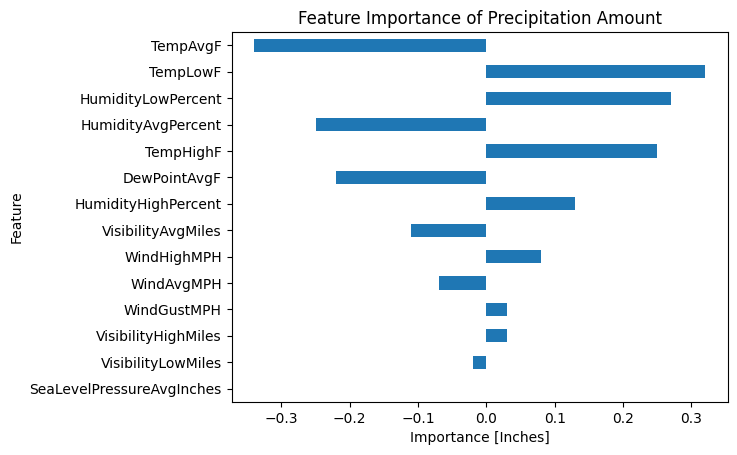

In [65]:
# Use a horizontal bar chart to show the top coefficients for my model, based on their absolute value

# Sort the coefficients in decending order:
feature_imp.sort_values()
# Sort them according to their absolute value:
feature_imp.sort_values(key=abs).tail(14).plot(kind="barh")
plt.xlabel("Importance [Inches]")
plt.ylabel("Feature")
plt.title("Feature Importance of Precipitation Amount");



### Model Predictions (Random Forest Regressor Model)

In [66]:
# Create a DataFrame to hold the true values of the test set and the model's predictions:
predictions = pd.DataFrame (
    zip(output_test, y_pred, output_test - y_pred),
    columns = ["y_test", "y_pred", "error"]
)

predictions.head(10)

,y_test,y_pred,error
0,0.00,0.0024,-0.0024
1,0.00,0.0000,0.0000
2,0.00,0.0153,-0.0153
3,0.00,0.0000,0.0000
4,0.13,0.0002,0.1298
5,0.00,0.0017,-0.0017
6,1.19,0.8810,0.3090
7,0.00,0.0000,0.0000
8,0.00,0.0073,-0.0073
9,0.11,0.1491,-0.0391


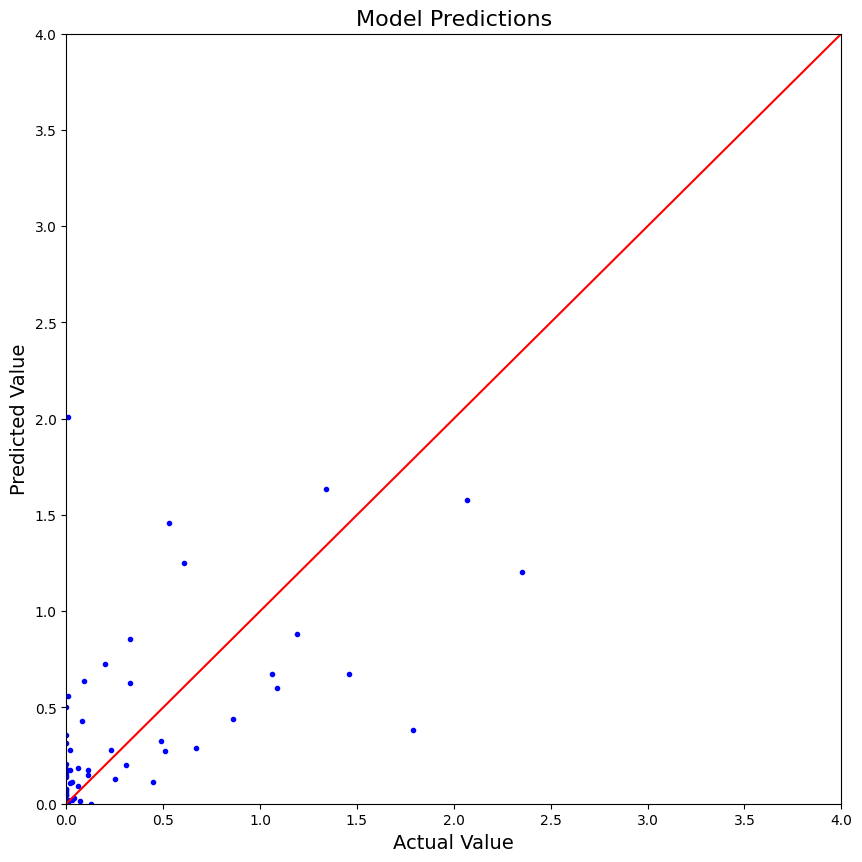

In [67]:
# Create a Line plot to visualize model results:

plt.figure(figsize = (10, 10))
x = np.linspace(0, 5, 5)
plt.plot(predictions["y_test"], predictions["y_pred"], 'b.')
plt.plot(x, x, 'r-')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.title("Model Predictions", fontsize=16)
plt.xlabel("Actual Value", fontsize=14)
plt.ylabel("Predicted Value", fontsize=14)
plt.savefig("Rainfall Predictions.png")
plt.show();

### Compare The Coefficients of The Ridge & Linear Regression Model

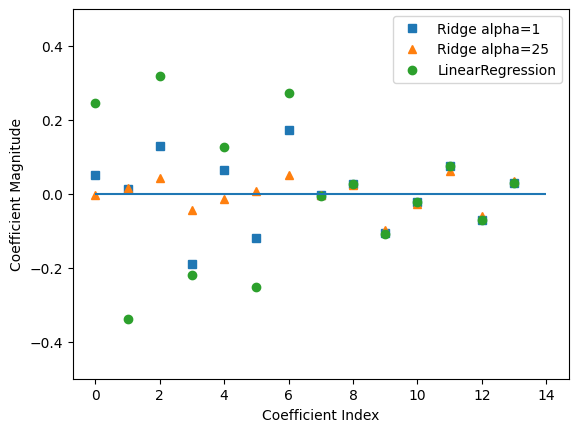

In [68]:
plt.plot(ridge.coef_, 's', label = "Ridge alpha=1")
plt.plot(ridge25.coef_, '^', label = "Ridge alpha=25")

plt.plot(model.coef_, 'o', label = "LinearRegression")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.hlines(0, 0, len(model.coef_))
plt.ylim(-0.5, 0.5)
plt.legend()